# Build a simple linear regression model by performing EDA and do necessary transformations
# and select the best model using R or Python.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#1 Find out the correlation
#2 model building
#3 Evaluation

In [2]:
data = pd.read_csv('Salary_Data.csv')
data.head()

YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0

In [3]:
data.shape

(30, 2)

In [4]:
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [6]:
data.describe()

YearsExperience         Salary
count        30.000000      30.000000
mean          5.313333   76003.000000
std           2.837888   27414.429785
min           1.100000   37731.000000
25%           3.200000   56720.750000
50%           4.700000   65237.000000
75%           7.700000  100544.750000
max          10.500000  122391.000000

<AxesSubplot:>

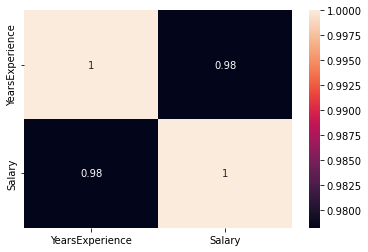

In [7]:
sns.heatmap(data.corr(), annot = True)

<AxesSubplot:>

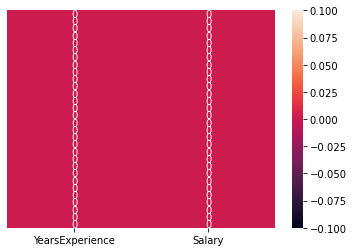

In [8]:
sns.heatmap(data.isnull(), annot = True, yticklabels=False)

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

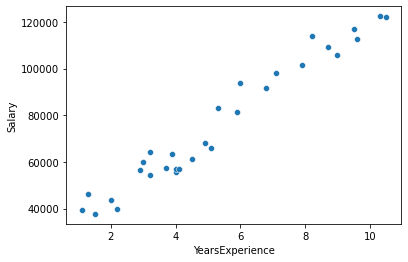

In [9]:
sns.scatterplot(x = data['YearsExperience'], y = data['Salary'])

<AxesSubplot:xlabel='YearsExperience'>

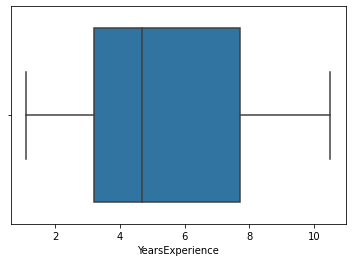

In [10]:
import warnings
warnings.filterwarnings('ignore')
sns.boxplot(data['YearsExperience'])

<AxesSubplot:xlabel='Salary'>

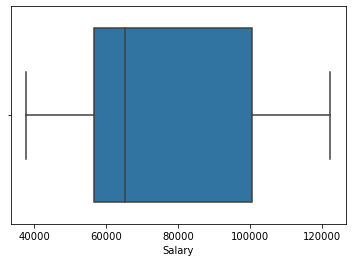

In [11]:
sns.boxplot(data['Salary'])

<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

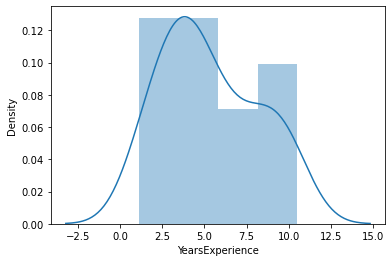

In [12]:
sns.distplot(data['YearsExperience'])

In [13]:
data['YearsExperience'].skew()

0.37956024064804106

<AxesSubplot:xlabel='Salary', ylabel='Density'>

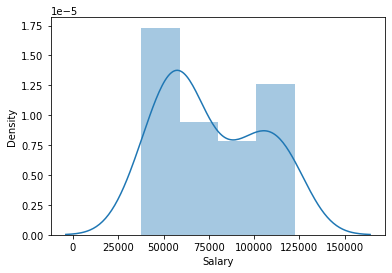

In [14]:
sns.distplot(data['Salary'])

In [15]:
data['Salary'].skew()

0.35411967922959153

In [16]:
# Creating the model by using sklearn model

In [17]:
x = data.iloc[:,0].values.reshape(-1,1)
y = data.iloc[:,1].values.reshape(-1,1)

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.1,random_state=42)

In [19]:
from sklearn.preprocessing import StandardScaler
std_scl = StandardScaler()

In [20]:
x_train = std_scl.fit_transform(x_train)
x_test = std_scl.fit_transform(x_test)
y_train = std_scl.fit_transform(y_train)
y_test = std_scl.fit_transform(y_test)

In [21]:
# Linear Regression
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [22]:
model = lin_reg.fit(x_train, y_train)

In [23]:
y_pred = model.predict(x_test)

In [24]:
from sklearn.metrics import r2_score, mean_squared_error

In [25]:
print("The Goodness of the model is", r2_score(y_test, y_pred)*100)
print("Mean squared error", mean_squared_error(y_test, y_pred))

The Goodness of the model is 90.21356039593793
Mean squared error 0.09786439604062074


In [26]:
model.intercept_

array([-3.66126683e-16])

In [27]:
model.coef_

array([[0.97866559]])

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

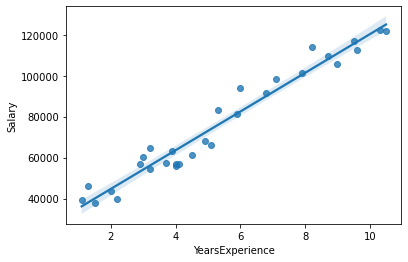

In [28]:
sns.regplot(x = data['YearsExperience'], y = data['Salary'])

In [29]:
# Creating the model by using stats model

In [30]:
import statsmodels.formula.api as smf

In [31]:
model = smf.ols('Salary~YearsExperience', data = data).fit()

In [32]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [33]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Tue, 18 Oct 2022   Prob (F-statistic):           1.14e-20
Time:                        07:08:03   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
model.resid

0      3155.841248
1      8127.848783
2     -2236.143681
3     -1167.124842
4     -6691.117306
5      3444.909069
6      6007.912837
7     -1587.079627
8      8412.920373
9     -3568.060788
10      570.946748
11    -7798.049484
12    -6635.049484
13    -7456.045717
14    -7206.030645
15    -4159.015574
16    -7958.008038
17     7210.999498
18     -183.977895
19    11448.025873
20     1686.056015
21     5386.067319
22      855.097462
23    10530.108765
24     1424.127605
25    -5259.861092
26     1402.157748
27    -3876.838485
28     -735.812110
29    -3144.804574
dtype: float64

In [35]:
model.predict()

array([ 36187.15875227,  38077.15121656,  39967.14368085,  44692.12484158,
        46582.11730587,  53197.09093089,  54142.08716303,  56032.07962732,
        56032.07962732,  60757.06078805,  62647.05325234,  63592.04948449,
        63592.04948449,  64537.04571663,  68317.03064522,  72097.0155738 ,
        73987.00803809,  75877.00050238,  81546.97789525,  82491.9741274 ,
        90051.94398456,  92886.932681  , 100446.90253816, 103281.8912346 ,
       108006.87239533, 110841.86109176, 115566.84225249, 116511.83848464,
       123126.81210966, 125016.80457395])

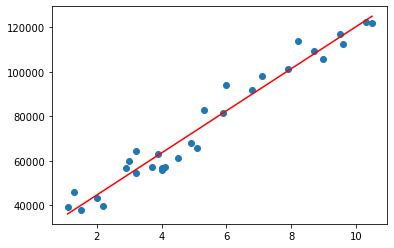

In [36]:
plt.scatter(data['YearsExperience'], data['Salary'])
plt.plot(data['YearsExperience'], model.predict(), color = 'red')

In [37]:
model = smf.ols('Salary~np.log(YearsExperience)', data = data).fit()

In [38]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Tue, 18 Oct 2022   Prob (F-statistic):           3.25e-13
Time:                        07:08:03   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(YearsExperience)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
model = smf.ols('np.log(Salary)~YearsExperience', data = data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Tue, 18 Oct 2022   Prob (F-statistic):           7.03e-18
Time:                        07:08:03   Log-Likelihood:                 28.183
No. Observations:                  30   AIC:                            -52.37
Df Residuals:                      28   BIC:                            -49.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          10.5074      0.038    273.327      0.000      10.429      10.586
YearsExperience     0.1255      0.006     19.585      0.000       0.112       0.139
==============================================================================
Omnibus:                        0.826   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.812
Skew:                           0.187   Prob(JB):                        0.666
Kurtosis:                       2.286   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
data1 = data

In [41]:
data1['Salary_sq'] = data['Salary']**2
data1.head()

YearsExperience   Salary     Salary_sq
0              1.1  39343.0  1.547872e+09
1              1.3  46205.0  2.134902e+09
2              1.5  37731.0  1.423628e+09
3              2.0  43525.0  1.894426e+09
4              2.2  39891.0  1.591292e+09

In [73]:
model = smf.ols('np.log(Salary_sq)~YearsExperience', data = data1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      np.log(Salary_sq)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Tue, 18 Oct 2022   Prob (F-statistic):           7.03e-18
Time:                        07:13:48   Log-Likelihood:                 7.3885
No. Observations:                  30   AIC:                            -10.78
Df Residuals:                      28   BIC:                            -7.975
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          21.0148      0.077    273.327      0.000      20.857      21.172
YearsExperience     0.2509      0.013     19.585      0.000       0.225       0.277
==============================================================================
Omnibus:                        0.826   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.812
Skew:                           0.187   Prob(JB):                        0.666
Kurtosis:                       2.286   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
# Delievary Dataset

In [44]:
df = pd.read_csv('delivery_time.csv')
df.head()

Delivery Time  Sorting Time
0          21.00            10
1          13.50             4
2          19.75             6
3          24.00             9
4          29.00            10

In [45]:
df.shape

(21, 2)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [47]:
df.describe()

Delivery Time  Sorting Time
count      21.000000     21.000000
mean       16.790952      6.190476
std         5.074901      2.542028
min         8.000000      2.000000
25%        13.500000      4.000000
50%        17.830000      6.000000
75%        19.750000      8.000000
max        29.000000     10.000000

<AxesSubplot:>

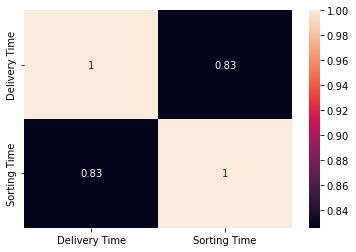

In [48]:
sns.heatmap(df.corr(), annot = True)

<AxesSubplot:>

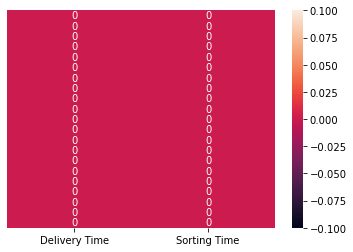

In [49]:
sns.heatmap(df.isnull(), annot =True, yticklabels=False)

In [50]:
df[df.duplicated()]

Empty DataFrame
Columns: [Delivery Time, Sorting Time]
Index: []

In [51]:
sns.boxplot(df['Delivery Time'])

<AxesSubplot:xlabel='Delivery Time'>

In [52]:
sns.boxplot(df['Sorting Time'])

<AxesSubplot:xlabel='Sorting Time'>

<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

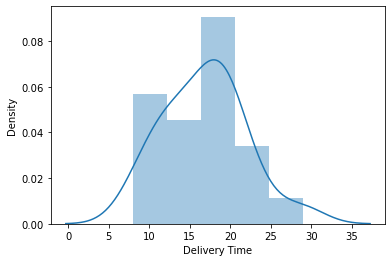

In [53]:
sns.distplot(df['Delivery Time'])

In [54]:
df['Delivery Time'].skew()

0.3523900822831107

<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

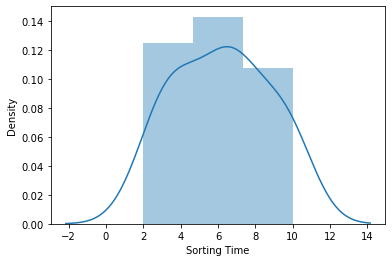

In [55]:
sns.distplot(df['Sorting Time'])

In [56]:
df['Sorting Time'].skew()

0.047115474210530174

In [57]:
# from sklearn model

In [58]:
x = data.iloc[:,0].values.reshape(-1,1)
y = data.iloc[:,1].values.reshape(-1,1)

In [59]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.02, random_state=42)

In [60]:
lin_reg = LinearRegression()

In [61]:
lin_reg.fit(x_train, y_train)

LinearRegression()

In [62]:
y_pred = lin_reg.predict(x_test)
y_pred

array([[117000.86265755]])

<AxesSubplot:xlabel='Delivery Time', ylabel='Sorting Time'>

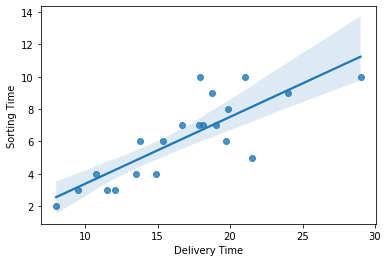

In [63]:
sns.regplot(x = df['Delivery Time'], y =df['Sorting Time'])

In [64]:
lin_reg.coef_

array([[9530.09344533]])

In [65]:
lin_reg.intercept_

array([25511.96558242])

In [66]:
# From using statsmodels

In [67]:
df.columns

Index(['Delivery Time', 'Sorting Time'], dtype='object')

In [70]:
x  = df['Delivery Time']
y = df['Sorting Time']

In [71]:
import statsmodels.formula.api as smf
lin_model = smf.ols('y~x', data = df).fit()

In [74]:
lin_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Tue, 18 Oct 2022   Prob (F-statistic):           3.98e-06
Time:                        07:14:08   Log-Likelihood:                -36.839
No. Observations:                  21   AIC:                             77.68
Df Residuals:                      19   BIC:                             79.77
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.7567      1.134     -0.667      0.513      -3.130       1.617
x              0.4137      0.065      6.387      0.000       0.278       0.549
==============================================================================
Omnibus:                        1.409   Durbin-Watson:                   1.346
Prob(Omnibus):                  0.494   Jarque-Bera (JB):                0.371
Skew:                           0.255   Prob(JB):                        0.831
Kurtosis:                       3.405   Cond. No.                         62.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:
lin_model = smf.ols('y~np.log(x)', data = df).fit()
lin_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     46.73
Date:                Tue, 18 Oct 2022   Prob (F-statistic):           1.59e-06
Time:                        07:15:39   Log-Likelihood:                -35.846
No. Observations:                  21   AIC:                             75.69
Df Residuals:                      19   BIC:                             77.78
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -12.4992      2.751     -4.543      0.000     -18.257      -6.741
np.log(x)      6.7355      0.985      6.836      0.000       4.673       8.798
==============================================================================
Omnibus:                        1.323   Durbin-Watson:                   1.202
Prob(Omnibus):                  0.516   Jarque-Bera (JB):                0.242
Skew:                          -0.025   Prob(JB):                        0.886
Kurtosis:                       3.523   Cond. No.                         28.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
lin_model = smf.ols('np.log(y)~(x)', data = df).fit()
lin_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              np.log(y)   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Tue, 18 Oct 2022   Prob (F-statistic):           2.64e-06
Time:                        07:16:41   Log-Likelihood:               -0.85600
No. Observations:                  21   AIC:                             5.712
Df Residuals:                      19   BIC:                             7.801
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4372      0.204      2.139      0.046       0.009       0.865
x              0.0769      0.012      6.587      0.000       0.052       0.101
==============================================================================
Omnibus:                        0.744   Durbin-Watson:                   1.691
Prob(Omnibus):                  0.689   Jarque-Bera (JB):                0.686
Skew:                          -0.101   Prob(JB):                        0.710
Kurtosis:                       2.138   Cond. No.                         62.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
lin_model = smf.ols('np.log(y)~np.log(x)', data = df).fit()
lin_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              np.log(y)   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     64.39
Date:                Tue, 18 Oct 2022   Prob (F-statistic):           1.60e-07
Time:                        07:17:26   Log-Likelihood:                 2.1913
No. Observations:                  21   AIC:                           -0.3826
Df Residuals:                      19   BIC:                             1.706
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8573      0.450     -4.131      0.001      -2.798      -0.916
np.log(x)      1.2923      0.161      8.024      0.000       0.955       1.629
==============================================================================
Omnibus:                        0.197   Durbin-Watson:                   1.365
Prob(Omnibus):                  0.906   Jarque-Bera (JB):                0.258
Skew:                          -0.192   Prob(JB):                        0.879
Kurtosis:                       2.617   Cond. No.                         28.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [78]:
lin_model = smf.ols('(y)~np.sqrt(x)', data = df).fit()
lin_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     45.20
Date:                Tue, 18 Oct 2022   Prob (F-statistic):           2.00e-06
Time:                        07:19:55   Log-Likelihood:                -36.093
No. Observations:                  21   AIC:                             76.19
Df Residuals:                      19   BIC:                             78.28
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -7.6154      2.077     -3.667      0.002     -11.962      -3.269
np.sqrt(x)     3.4073      0.507      6.723      0.000       2.347       4.468
==============================================================================
Omnibus:                        1.570   Durbin-Watson:                   1.249
Prob(Omnibus):                  0.456   Jarque-Bera (JB):                0.368
Skew:                           0.109   Prob(JB):                        0.832
Kurtosis:                       3.611   Cond. No.                         29.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [79]:
lin_model = smf.ols('np.sqrt(y)~np.sqrt(x)', data = df).fit()
lin_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.sqrt(y)   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     51.16
Date:                Tue, 18 Oct 2022   Prob (F-statistic):           8.48e-07
Time:                        07:21:48   Log-Likelihood:                -2.3695
No. Observations:                  21   AIC:                             8.739
Df Residuals:                      19   BIC:                             10.83
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.5151      0.417     -1.236      0.232      -1.388       0.357
np.sqrt(x)     0.7276      0.102      7.153      0.000       0.515       0.940
==============================================================================
Omnibus:                        0.396   Durbin-Watson:                   1.353
Prob(Omnibus):                  0.820   Jarque-Bera (JB):                0.001
Skew:                          -0.005   Prob(JB):                         1.00
Kurtosis:                       3.029   Cond. No.                         29.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Correlation [-1, 1]